# Test

In [1]:
%matplotlib inline

In [3]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import cv2
import opencvutils as cvu

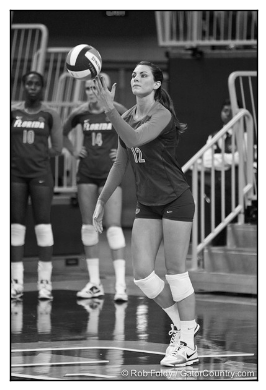

In [24]:
http = 'https://photos.smugmug.com/Gator-Volleyball/FloridavolleyballvsBC28aug26/i-ZVVmnLn/0/L/11082615_VBvsBC_RFoldy-L.jpg'
img = cvu.url_to_image(http, 0)
cvu.imshow([img]);

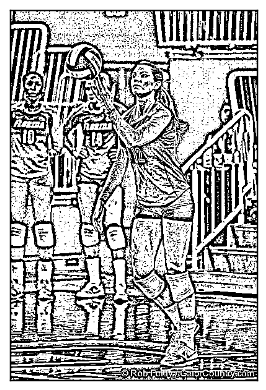

In [25]:
# http://docs.opencv.org/3.2.0/d7/d4d/tutorial_py_thresholding.html
# Adaptive Method - It decides how thresholding value is calculated.
# cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
# Block Size - It decides the size of neighbourhood area.
# C - It is just a constant which is subtracted from the mean or weighted mean calculated.
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cvu.imshow([thresh]);

In [14]:
help(cv2.adaptiveThreshold)

Help on built-in function adaptiveThreshold:

adaptiveThreshold(...)
    adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst



# Stereo

http://docs.opencv.org/3.2.0/dd/d53/tutorial_py_depthmap.html

![](stereo_depth.jpg)

Using the diagram above, disparity is defined as: disparity $= x - x' = \frac{Bf}{Z}$

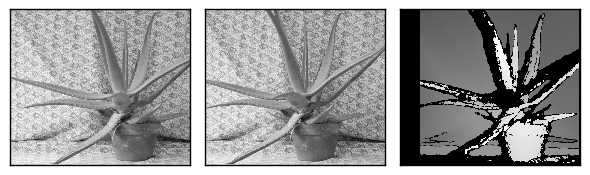

In [86]:
imgL = cv2.imread('aloeL.jpg',0)
imgR = cv2.imread('aloeR.jpg',0)
stereo = cv2.StereoBM_create(numDisparities=128, blockSize=31)
disparity = stereo.compute(imgL,imgR)
cvu.imshow([imgL,imgR, disparity])

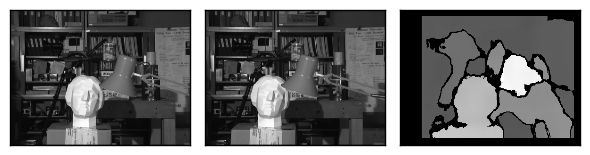

In [67]:
imgL = cv2.imread('tsukubaLeft.png',0)
imgR = cv2.imread('tsukubaRight.png',0)

# adjust performance via disparities (must be a multiple of 16) and blocksize (has to be odd)
stereo = cv2.StereoBM_create(numDisparities=32, blockSize=31)
disparity = stereo.compute(imgL,imgR)
cvu.imshow([imgL,imgR, disparity])

# Camera Model

http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html

![](pinhole_camera_model.png)

$$ s m = A \left[R|t\right]M $$

$$
s \begin{bmatrix} u \\ v \\ 1 \end{bmatrix} =
\begin{bmatrix}
    f_x & 0   & c_x \\
    0   & f_y & c_y \\
    0   & 0   & 1
\end{bmatrix}
\begin{bmatrix}
    r_{11} & r_{12} & r_{13} & t_1 \\
    r_{21} & r_{22} & r_{23} & t_2 \\
    r_{31} & r_{32} & r_{33} & t_3 \\
\end{bmatrix}
\begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix}
$$

where:
- M, (X, Y, Z, 1) are the homogenious coordinates of a 3D point in the world coordinate space
- m, (u, v) are the coordinates of the projection point in pixels on the image plane
- A is a camera matrix, or a matrix of intrinsic parameters
- (cx, cy) is a principal point that is usually at the image center
- fx, fy are the focal lengths expressed in pixel units.
- R is the camera rotation matrix
- t is the translation matrix
- s is a scale factor

$$
    \begin{bmatrix} x \\ y \\ z \end{bmatrix} = R \begin{bmatrix} X \\ Y \\ Z \end{bmatrix} + t \\
    u = f_x \frac{x}{z} + c_x \\
    v = f_y \frac{y}{z} + c_y
$$


# Distortion

![](distortion_examples.png)

The presence of the radial distortion manifests in form of the "barrel" or "fish-eye" effect. Tangential distortion occurs because the image taking lenses are not perfectly parallel to the imaging plane.

distortion coefficients $=(k1,k2,p1,p2,k3)$

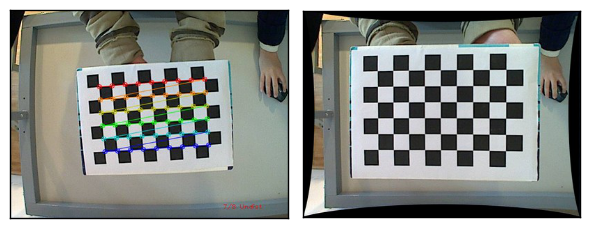

In [89]:
a = cv2.imread('raw_image.jpg')
b = cv2.imread('corrected_image.jpg')
cvu.imshow([a,b])

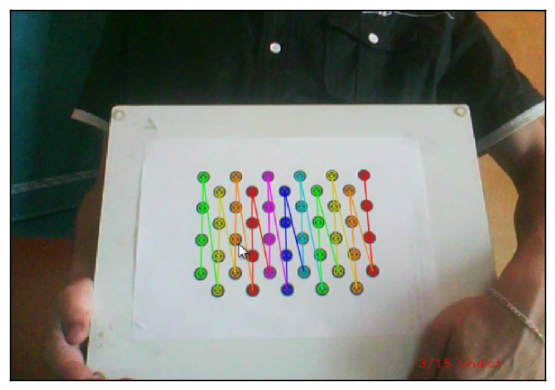

In [90]:
a = cv2.imread('asymetrical_cal.jpg')
cvu.imshow([a])

# Size

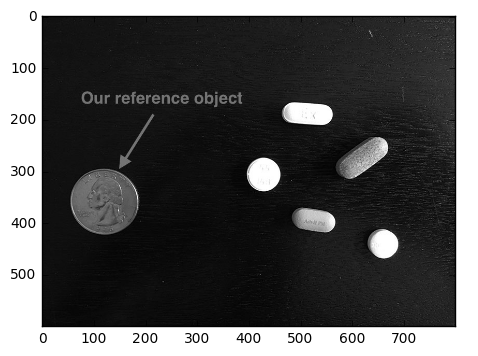

In [75]:
gray = cv2.imread('objects.jpg', 0)
plt.imshow(gray, 'gray');

In [88]:
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# (cnts, _) = cvu.contours.sort_contours(cnts)

In [69]:
for c in cnts:
    if cv2.contourArea(c) < 100:
        continue
        
#     box = cv2.minAreaRect(c)
#     box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
#     box = np.array(box, dtype="int")
    box = cv2.minAreaRect(c)
    box = cv2.boxPoints(box)
    box = np.array(box, dtype="int")

error: /tmp/opencv3-20170122-88480-338ai0/modules/imgproc/src/shapedescr.cpp:320: error: (-215) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function contourArea


In [73]:
type(cnts[0])
cv2.contourArea(cnts[0])

error: /tmp/opencv3-20170122-88480-338ai0/modules/imgproc/src/shapedescr.cpp:320: error: (-215) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function contourArea
